In [1]:
import sys
print(sys.executable)


c:\Users\panak\AppData\Local\Programs\Python\Python311\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [3]:
df = pd.read_csv("HR_Data.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'HR_Data.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [ ]:
df.describe()

,Unnamed: 0,Performance_Rating,Experience_Years,Salary_INR
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.000148e+00,5.010287e+00,8.968878e+05
std,5.773504e+05,1.413973e+00,3.608823e+00,4.026103e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+05
25%,4.999998e+05,2.000000e+00,2.000000e+00,6.163460e+05
50%,9.999995e+05,3.000000e+00,5.000000e+00,8.110265e+05
75%,1.499999e+06,4.000000e+00,8.000000e+00,1.073745e+06
max,1.999999e+06,5.000000e+00,1.500000e+01,2.999976e+06


In [ ]:
# Convert 'Status' to numeric: 1 = Left, 0 = Still employed
df['left'] = df['Status'].apply(lambda x: 1 if str(x).lower() in ['left', 'resigned', 'terminated', 'inactive'] else 0)


In [ ]:
df['left'].value_counts()

left
0    1501470
1     498530
Name: count, dtype: int64

In [ ]:
df['left'].value_counts(normalize=True)

left
0    0.750735
1    0.249265
Name: proportion, dtype: float64

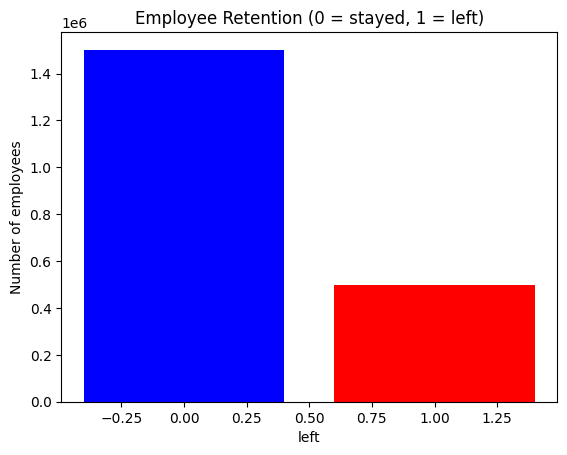

In [ ]:
# EDA
#task 1
counts = df['left'].value_counts()
plt.bar(counts.index, counts.values, color = ['blue', 'red'])
plt.title('Employee Retention (0 = stayed, 1 = left)')
plt.xlabel('left')
plt.ylabel('Number of employees')
plt.show()

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
print(df.columns.tolist())


['unnamed:_0', 'employee_id', 'full_name', 'department', 'job_title', 'hire_date', 'location', 'performance_rating', 'experience_years', 'status', 'work_mode', 'salary_inr', 'left']


In [ ]:
df['salary_bin'] = pd.qcut(df['salary_inr'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


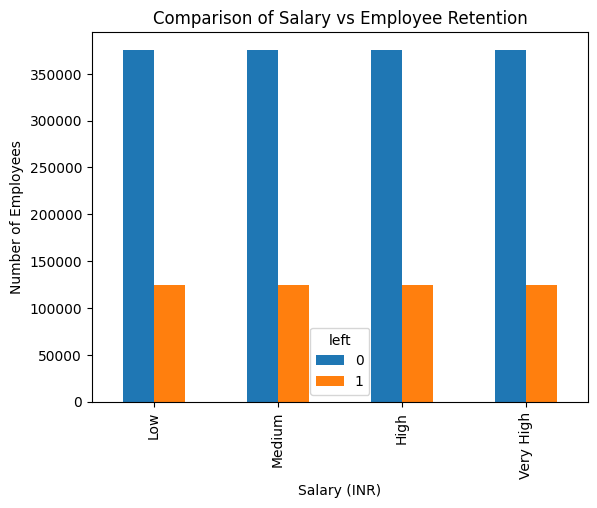

In [ ]:
counts = pd.crosstab(df['salary_bin'], df['left'])
counts.plot(kind='bar')
plt.title('Comparison of Salary vs Employee Retention')
plt.xlabel('Salary (INR)')
plt.ylabel('Number of Employees')
plt.show()


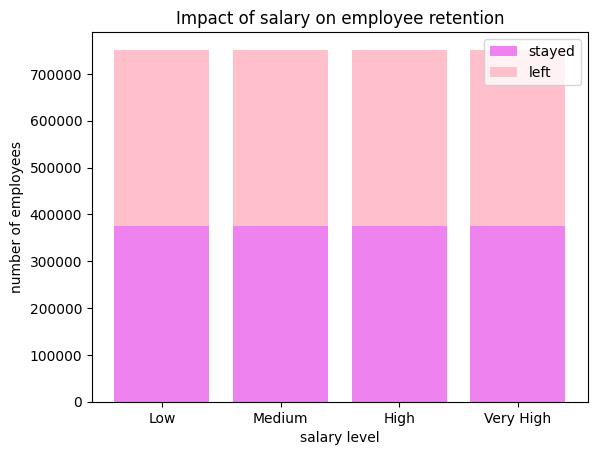

In [ ]:
#task 2
counts = pd.crosstab(df['salary_bin'], df['left'])
plt.bar(counts.index, counts[0], color = 'violet', label = 'stayed')
plt.bar(counts.index, counts[0], bottom = counts[0], color = 'pink', label = 'left')
plt.title('Impact of salary on employee retention')
plt.xlabel('salary level')
plt.ylabel('number of employees')
plt.legend()
plt.show()

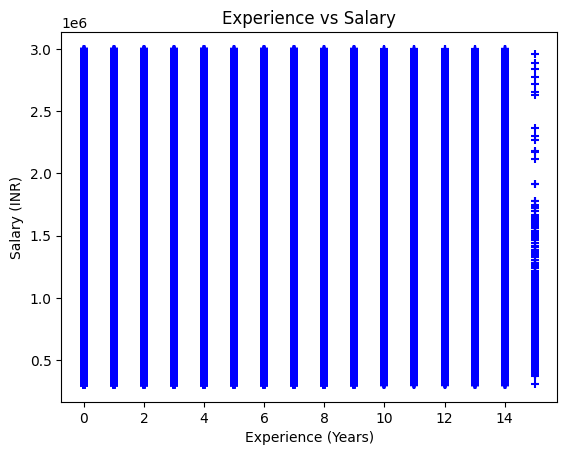

In [ ]:
plt.scatter(df['experience_years'], df['salary_inr'], marker='+', color='blue')
plt.title('Experience vs Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (INR)')
plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split
# X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
# y = df['left']




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()
for col in ['department', 'job_title', 'location', 'work_mode']:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df[['performance_rating', 'experience_years', 'salary_inr',
        'department', 'job_title', 'location', 'work_mode']]
y = df['left']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_test

,performance_rating,experience_years,salary_inr,department,job_title,location,work_mode
323542,5,3,788211,3,18,319891,0
1047988,3,5,854463,4,20,748439,0
48082,1,3,681900,1,28,264410,0
1049147,3,7,774370,0,10,1495740,1
19594,1,13,514638,4,17,270321,0
...,...,...,...,...,...,...,...
1840761,4,5,930164,3,23,1073793,0
454971,2,1,778272,0,1,1329953,0
119939,3,8,681638,1,12,68920,1
10358,4,0,1198561,5,22,921940,0


In [ ]:
X_train

,performance_rating,experience_years,salary_inr,department,job_title,location,work_mode
1966231,2,6,771160,2,7,1121266,1
1078846,5,2,744405,2,7,369500,0
1283476,5,3,643508,6,0,1392637,0
1726286,5,1,1137826,4,20,189673,0
696408,1,8,689843,2,26,307946,1
...,...,...,...,...,...,...,...
1340441,2,6,933405,4,20,1164116,0
1070249,5,4,1331712,0,9,1231244,0
835274,2,3,1129894,2,8,1255251,1
1696204,2,6,868306,2,26,1219106,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test, y_test)

0.7508955555555555

In [ ]:
model.predict_proba(X_test)

array([[0.73696767, 0.26303233],
       [0.75249949, 0.24750051],
       [0.66191993, 0.33808007],
       ...,
       [0.68213617, 0.31786383],
       [0.78679663, 0.21320337],
       [0.72830689, 0.27169311]])

In [ ]:
!pip install --upgrade seaborn


Defaulting to user installation because normal site-packages is not writeable


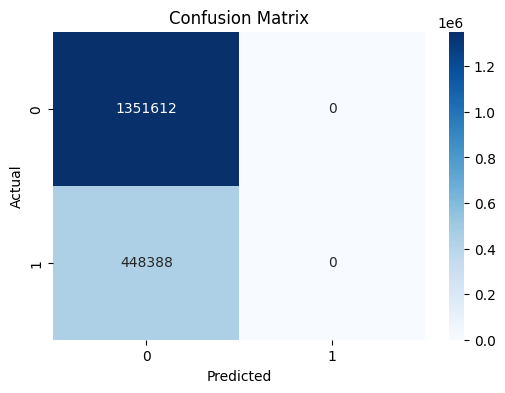

Classification Report:


c:\Users\panak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\panak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\panak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

              precision    recall  f1-score   support

           0       0.75      1.00      0.86   1351612
           1       0.00      0.00      0.00    448388

    accuracy                           0.75   1800000
   macro avg       0.38      0.50      0.43   1800000
weighted avg       0.56      0.75      0.64   1800000

ROC-AUC Score: 0.5002


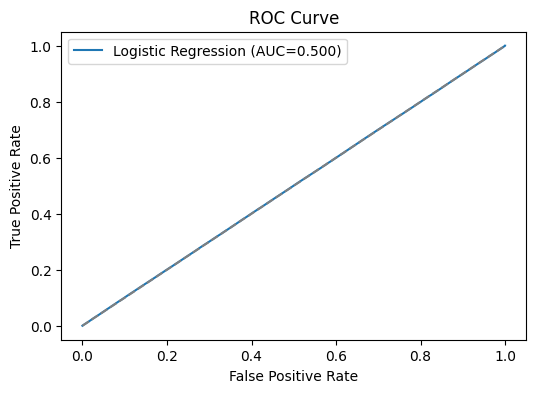

In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import seaborn as sns
# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
y_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={auc:.3f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


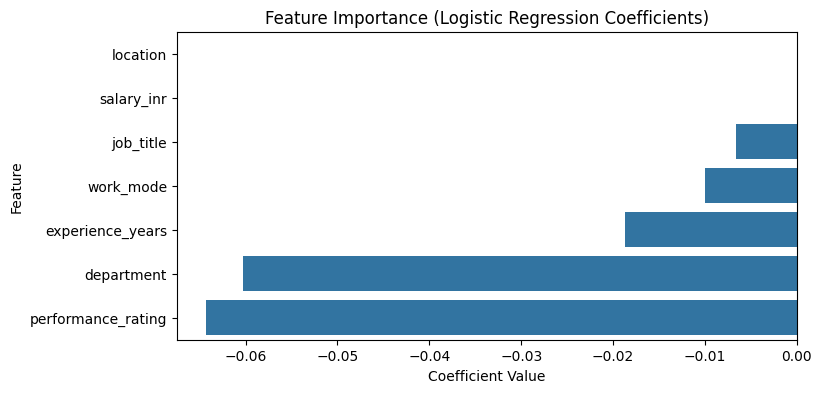

In [ ]:
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


Accuracy: 0.750735
ROC-AUC : 0.49805594733891306


c:\Users\panak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\panak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\panak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave


Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    300294
           1       0.00      0.00      0.00     99706

    accuracy                           0.75    400000
   macro avg       0.38      0.50      0.43    400000
weighted avg       0.56      0.75      0.64    400000



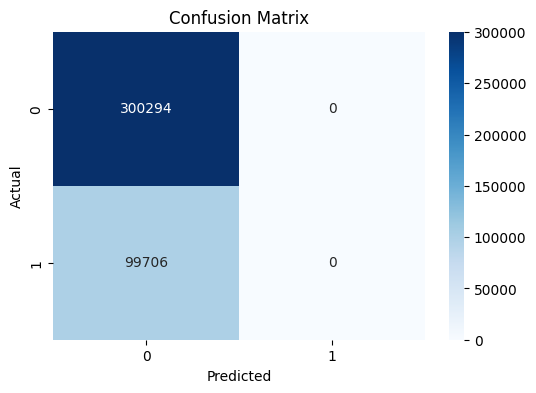

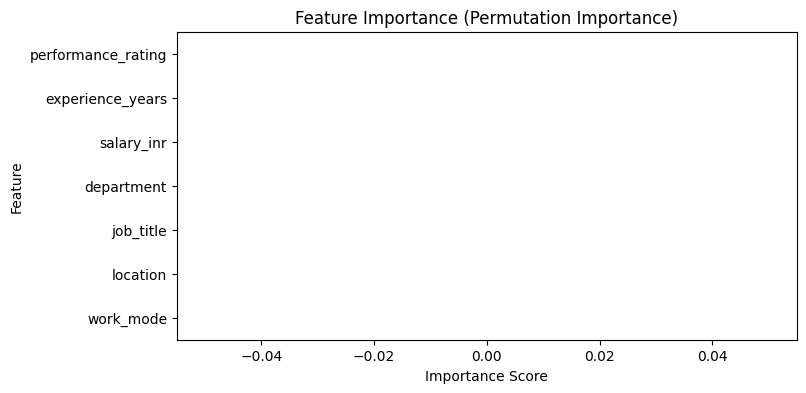

Model saved as employee_attrition_model.pkl


In [ ]:
# ==========================================
# EMPLOYEE ATTRITION PREDICTION PIPELINE
# ==========================================



from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import joblib

# -------------------------------
# 1. Prepare Data
# -------------------------------

num_cols = ['performance_rating','experience_years','salary_inr']
cat_cols = ['department','job_title','location','work_mode']

# Optional memory optimization
for c in num_cols + cat_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce', downcast='integer')

X = df[num_cols + cat_cols]
y = df['left'].astype('int8')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 2. Train Model (Fast & Strong)
# -------------------------------

model = HistGradientBoostingClassifier(
    max_depth=8,
    learning_rate=0.12,
    max_iter=250,
    validation_fraction=0.1,
    early_stopping=True,
    l2_regularization=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# -------------------------------
# 3. Evaluate
# -------------------------------

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype('int8')

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC :", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -------------------------------
# 4. Feature Importance
# -------------------------------

r = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)
importance = pd.Series(r.importances_mean, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=importance.values, y=importance.index)
plt.title('Feature Importance (Permutation Importance)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# -------------------------------
# 5. Save Model
# -------------------------------

joblib.dump(model, "employee_attrition_model.pkl")
print("Model saved as employee_attrition_model.pkl")


In [ ]:
import os
os.getcwd()


'c:\\Users\\panak\\Downloads'

In [ ]:
import os
print(os.listdir())


['10_transformer model.pdf', '11_AI Ethic.pdf', 'AI_Powered_Resume_Job_Matcher_Proposal.pdf', 'Cloud-Computing-project-by_g8.zip', 'desktop.ini', 'download', 'Email_Template_HTML.htm', 'Employees_data', 'employee_attrition_model.pkl', 'extracted_content.xlsx', 'group8_project.zip', 'Homework 4(Nandu)_ML.pdf', 'Homework 4.docx', 'HR_Data.csv', 'HW4(Nandu_700770346).pdf', 'in-class Assignment4(Nandu).pdf', 'in-class Assignment4.docx', 'Jio Robotics Website Updates Document2.docx', 'Microservices.pdf', 'ML_Project.ipynb', 'ML_Project.zip', 'Nandu_Panakanti_Resume.pdf', 'nandu_portfolio.png', 'New Website Updates .xlsx', 'New-Project (1).zip', 'New-Project (2).zip', 'New-Project.zip', 'node-v24.11.0-x64.msi', 'python-3.11.3-amd64.exe', 'Quiz4(Nandu).pdf', 'Quiz4.docx', '~$lar cell .docx']


In [8]:
# 1️⃣ Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import joblib

# 2️⃣ Load data
df = pd.read_csv("HR_Data.csv")

# 3️⃣ Inspect your columns
print(df.columns)
print(df.head(3))

# 4️⃣ Check what Status looks like
print(df["Status"].value_counts())


Index(['Unnamed: 0', 'Employee_ID', 'Full_Name', 'Department', 'Job_Title',
       'Hire_Date', 'Location', 'Performance_Rating', 'Experience_Years',
       'Status', 'Work_Mode', 'Salary_INR'],
      dtype='object')
   Unnamed: 0 Employee_ID        Full_Name Department          Job_Title  \
0           0  EMP0000001    Joshua Nguyen         IT  Software Engineer   
1           1  EMP0000002   Julie Williams  Marketing     SEO Specialist   
2           2  EMP0000003  Alyssa Martinez         HR         HR Manager   

    Hire_Date                          Location  Performance_Rating  \
0  2011-08-10                Isaacland, Denmark                   5   
1  2018-03-02           Anthonyside, Costa Rica                   2   
2  2023-03-20  Port Christinaport, Saudi Arabia                   1   

   Experience_Years    Status Work_Mode  Salary_INR  
0                14  Resigned   On-site     1585363  
1                 7    Active   On-site      847686  
2                 2    Active  

In [9]:
# 1️⃣ Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import joblib

# 2️⃣ Load data
df = pd.read_csv("HR_Data.csv")

# 3️⃣ Encode target column
df["left"] = df["Status"].apply(
    lambda x: 0 if str(x).strip().lower() == "active" else 1
)

# 4️⃣ Drop unused / irrelevant columns
df = df.drop(columns=["Unnamed: 0", "Employee_ID", "Full_Name", "Hire_Date", "Status"])

# 5️⃣ Split features and target
X = df.drop(columns=["left"])
y = df["left"]

# 6️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7️⃣ Define numeric & categorical columns
numeric_features = ["Performance_Rating", "Experience_Years", "Salary_INR"]
categorical_features = ["Department", "Job_Title", "Location", "Work_Mode"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# 8️⃣ Build pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500))
])

# 9️⃣ Train the model
print("Training model...")
model.fit(X_train, y_train)
print("✅ Model training complete!")

# 🔟 Save the model
joblib.dump(model, "employee_attrition_pipeline.pkl")
print("💾 Model saved as employee_attrition_pipeline.pkl")

# ✅ Verify class distribution
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))


Training model...
✅ Model training complete!
💾 Model saved as employee_attrition_pipeline.pkl
Class distribution in training set:
left
0    0.700779
1    0.299221
Name: proportion, dtype: float64
